## QUESTION 2 :

Q2. In the UCI Machine Learning data repository, there is a dataset called autompg. For that dataset choose only 5 variables, that is, Mileage, Displacement, Acceleration, Weight and Horsepower. Write a python program which will take a combination of two variables out of these 5 variables, runs a KMeans clustering on that subset and plot the scatterplot with color coding for clusters. For clustering, you need to decide the optimum number of clusters for each combination. The output will be a set of 10 scatter plots. Annotate the plots if you like.

## DATA SOURCE :


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition. "The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993).
Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Data Import and Pre-processing

In [2]:
autompg = pd.read_csv("auto-mpg.data-original.csv")

In [3]:
autompg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
autompg.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model           0
origin          0
car             0
dtype: int64

In [5]:
autompg['mpg']=autompg.groupby(['cylinders','model'])['mpg'].transform(lambda x: x.fillna(value=autompg['mpg'].mean()))

In [6]:
autompg.mpg.isnull().sum()

0

In [7]:
autompg['horsepower']=autompg.groupby(['cylinders','model'])['horsepower'].transform(lambda x: x.fillna(value=autompg['horsepower'].mean()))

In [8]:
autompg.horsepower.isnull().sum()

0

In [9]:
X = autompg[['mpg','displacement','horsepower','weight','acceleration']]

In [10]:
X.head()

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504,12.0
1,15.0,350.0,165.0,3693,11.5
2,18.0,318.0,150.0,3436,11.0
3,16.0,304.0,150.0,3433,12.0
4,17.0,302.0,140.0,3449,10.5


In [11]:
X.describe()

,mpg,displacement,horsepower,weight,acceleration
count,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,194.779557,105.082500,2979.413793,15.519704
std,7.738404,104.922458,38.480531,847.004328,2.803359
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,105.000000,76.000000,2226.500000,13.700000
50%,23.000000,151.000000,95.000000,2822.500000,15.500000
75%,29.000000,302.000000,129.000000,3618.250000,17.175000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


In [12]:
X.shape

(406, 5)

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 5 columns):
mpg             406 non-null float64
displacement    406 non-null float64
horsepower      406 non-null float64
weight          406 non-null int64
acceleration    406 non-null float64
dtypes: float64(4), int64(1)
memory usage: 16.0 KB


## K-Means Clustering Model

In [14]:
from sklearn.cluster import KMeans

In [15]:
k_cluster = X.copy(deep=True)

## K-Means Clustering for 'mpg' vs 'displacement'

Text(0, 0.5, 'WCSS')

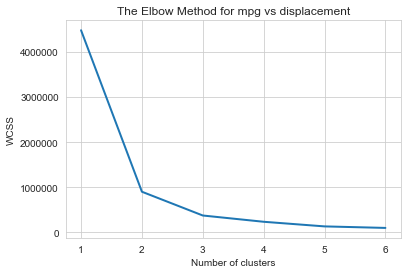

In [16]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=10)
    kmeans.fit(X[['mpg','displacement']])


    wcss.append(kmeans.inertia_)

sns.set_style('whitegrid')
sns.lineplot(x=range(1,7), y=wcss,lw= 2)
plt.title('The Elbow Method for mpg vs displacement')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
                 

In [17]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=10)
kmeans.fit(X[['mpg','displacement']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [18]:
k_cluster['clusters']= kmeans.fit_predict(X[['mpg','displacement']])

Text(0.5, 1, 'Clusters between mpg vs displacement')

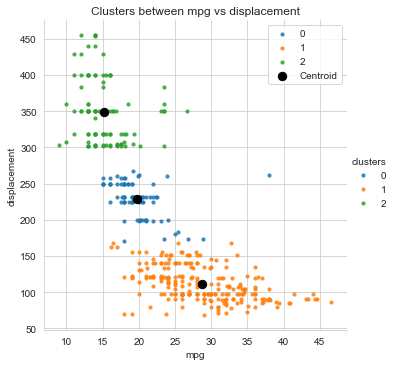

In [19]:
sns.lmplot(x='mpg', y='displacement', data=k_cluster, hue='clusters', fit_reg=False, scatter_kws={'s': 10})
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c ='black', label = 'Centroid')
plt.legend()
plt.title('Clusters between mpg vs displacement')

## K-Means Clustering for 'mpg' vs 'horsepower

Text(0, 0.5, 'WCSS')

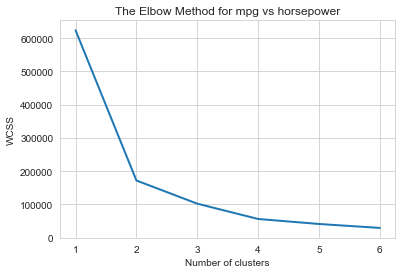

In [20]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=10)
    kmeans.fit(X[['mpg','horsepower']])


    wcss.append(kmeans.inertia_)

sns.set_style('whitegrid')
sns.lineplot(x=range(1,7), y=wcss,lw= 2)
plt.title('The Elbow Method for mpg vs horsepower')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [21]:
kmeans = KMeans(n_clusters = 4, init='k-means++', random_state=10)
kmeans.fit(X[['mpg','horsepower']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [22]:
k_cluster['clusters']= kmeans.fit_predict(X[['mpg','horsepower']])

Text(0.5, 1, 'Clusters between mpg vs horsepower')

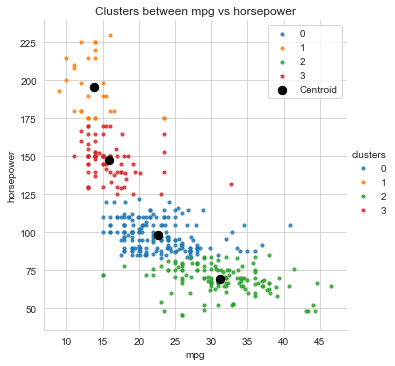

In [23]:
sns.lmplot(x='mpg', y='horsepower', data=k_cluster, hue='clusters', fit_reg=False, scatter_kws={'s': 10})
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c ='black', label = 'Centroid')
plt.legend()
plt.title('Clusters between mpg vs horsepower')

## K-Means Clustering for 'mpg' vs 'weight

Text(0, 0.5, 'WCSS')

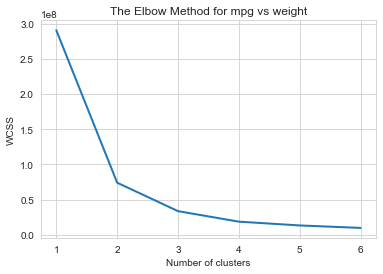

In [24]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=10)
    kmeans.fit(X[['mpg','weight']])
    
    wcss.append(kmeans.inertia_)

sns.set_style('whitegrid')
sns.lineplot(x=range(1,7), y=wcss,lw= 2)
plt.title('The Elbow Method for mpg vs weight')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')        

In [25]:
kmeans = KMeans(n_clusters = 4, init='k-means++', random_state=10)
kmeans.fit(X[['mpg','weight']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [26]:
k_cluster['clusters']= kmeans.fit_predict(X[['mpg','weight']])

Text(0.5, 1, 'Clusters between mpg vs weight')

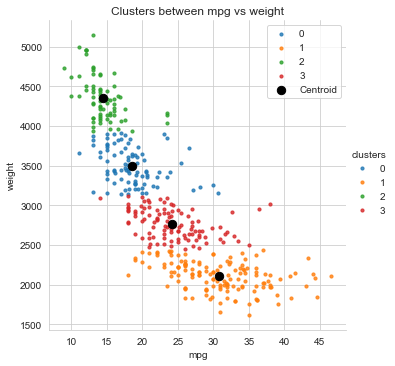

In [27]:
sns.lmplot(x='mpg', y='weight', data=k_cluster, hue='clusters', fit_reg=False, scatter_kws={'s': 10})
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c ='black', label = 'Centroid')
plt.legend()
plt.title('Clusters between mpg vs weight')

## K-Means Clustering for 'mpg' vs 'acceleration'

Text(0, 0.5, 'WCSS')

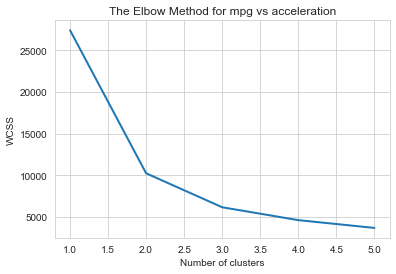

In [28]:
wcss=[]
for i in range(1,6):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=10)
    kmeans.fit(X[['mpg','acceleration']])
    
    wcss.append(kmeans.inertia_)

sns.set_style('whitegrid')
sns.lineplot(x=range(1,6), y=wcss,lw= 2)
plt.title('The Elbow Method for mpg vs acceleration')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  

In [29]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=10)
kmeans.fit(X[['mpg','acceleration']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [30]:
k_cluster['clusters']= kmeans.fit_predict(X[['mpg','acceleration']])

Text(0.5, 1, 'Clusters between mpg vs acceleration')

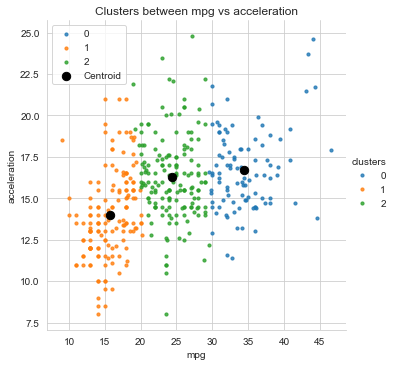

In [31]:
sns.lmplot(x='mpg', y='acceleration', data=k_cluster, hue='clusters', fit_reg=False,scatter_kws={'s': 10})
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c ='black', label = 'Centroid')
plt.legend()
plt.title('Clusters between mpg vs acceleration')

## K-Means Clustering for 'displacement' vs 'horsepower'

Text(0, 0.5, 'WCSS')

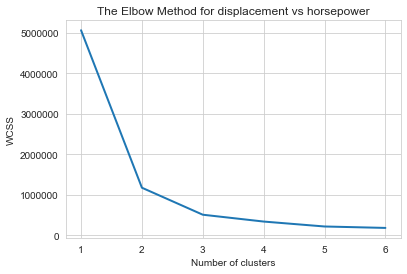

In [32]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=10)
    kmeans.fit(X[['displacement','horsepower']])
    
    wcss.append(kmeans.inertia_)

sns.set_style('whitegrid')
sns.lineplot(x=range(1,7), y=wcss,lw= 2)
plt.title('The Elbow Method for displacement vs horsepower')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  

In [33]:
kmeans = KMeans(n_clusters =3, init='k-means++', random_state=10)
kmeans.fit(X[['displacement','horsepower']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [34]:
k_cluster['clusters']= kmeans.fit_predict(X[['displacement','horsepower']])

Text(0.5, 1, 'Clusters between displacement vs horsepower')

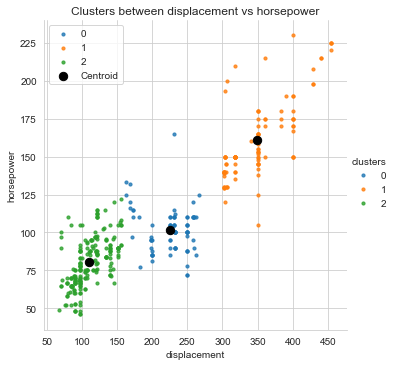

In [35]:
sns.lmplot(x='displacement', y='horsepower', data=k_cluster, hue='clusters', fit_reg=False,scatter_kws={'s': 10})
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c ='black', label = 'Centroid')
plt.legend()
plt.title('Clusters between displacement vs horsepower')

## K-Means Clustering for 'displacement' vs 'weight'

Text(0, 0.5, 'WCSS')

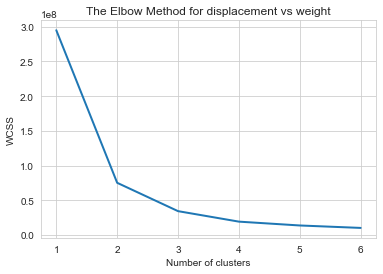

In [36]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=10)
    kmeans.fit(X[['displacement','weight']])
    
    wcss.append(kmeans.inertia_)

sns.set_style('whitegrid')
sns.lineplot(x=range(1,7), y=wcss,lw= 2)
plt.title('The Elbow Method for displacement vs weight')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  

In [37]:
kmeans = KMeans(n_clusters = 4, init='k-means++', random_state=10)
kmeans.fit(X[['displacement','weight']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [38]:
k_cluster['clusters']= kmeans.fit_predict(X[['displacement','weight']])

Text(0.5, 1, 'Clusters between displacement vs weight')

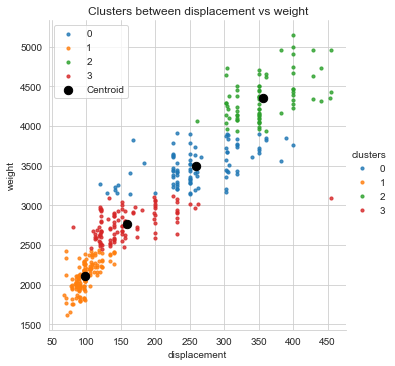

In [39]:
sns.lmplot(x='displacement', y='weight', data=k_cluster, hue='clusters', fit_reg=False,scatter_kws={'s': 10})
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c ='black', label = 'Centroid')
plt.legend()
plt.title('Clusters between displacement vs weight')

## K-Means Clustering for 'displacement' vs 'acceleration'

Text(0, 0.5, 'WCSS')

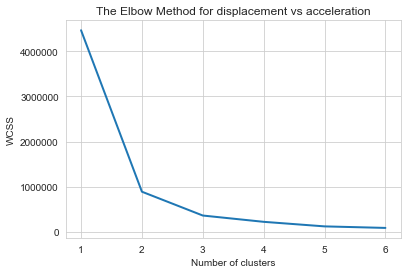

In [40]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=10)
    kmeans.fit(X[['displacement','acceleration']])
    
    wcss.append(kmeans.inertia_)

sns.set_style('whitegrid')
sns.lineplot(x=range(1,7), y=wcss,lw= 2)
plt.title('The Elbow Method for displacement vs acceleration')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 

In [41]:
kmeans = KMeans(n_clusters = 4, init='k-means++', random_state=10)
kmeans.fit(X[['displacement','acceleration']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [42]:
k_cluster['clusters']= kmeans.fit_predict(X[['displacement','acceleration']])

Text(0.5, 1, 'Clusters between displacement vs acceleration')

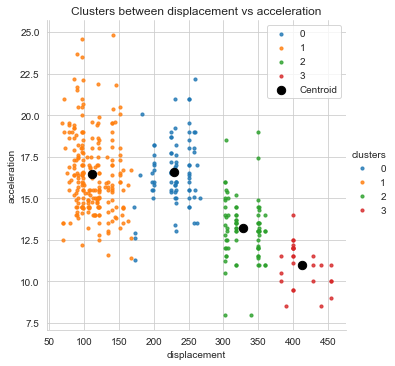

In [43]:
sns.lmplot(x='displacement', y='acceleration', data=k_cluster, hue='clusters', fit_reg=False,scatter_kws={'s': 10})
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c ='black', label = 'Centroid')
plt.legend()
plt.title('Clusters between displacement vs acceleration')

## K-Means Clustering for 'horsepower' vs 'weight'

Text(0, 0.5, 'WCSS')

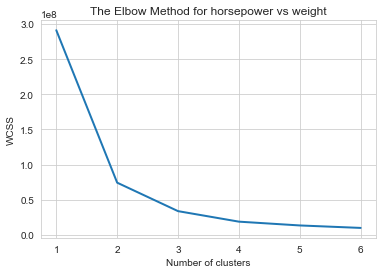

In [44]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=10)
    kmeans.fit(X[['horsepower','weight']])
    
    wcss.append(kmeans.inertia_)

sns.set_style('whitegrid')
sns.lineplot(x=range(1,7), y=wcss,lw= 2)
plt.title('The Elbow Method for horsepower vs weight')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  

In [45]:
kmeans = KMeans(n_clusters = 4, init='k-means++', random_state=10)
kmeans.fit(X[['horsepower','weight']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [46]:
k_cluster['clusters']= kmeans.fit_predict(X[['horsepower','weight']])

Text(0.5, 1, 'Clusters between horsepower vs weight')

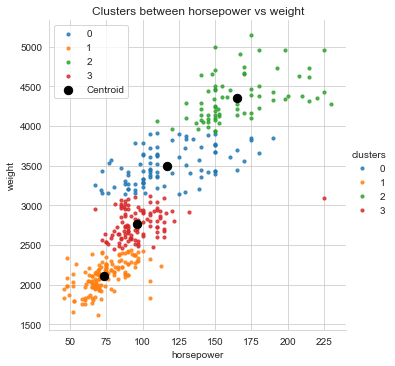

In [47]:
sns.lmplot(x='horsepower', y='weight', data=k_cluster, hue='clusters', fit_reg=False,scatter_kws={'s': 10})
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c ='black', label = 'Centroid')
plt.legend()
plt.title('Clusters between horsepower vs weight')

## K-Means Clustering for 'horsepower' vs 'acceleration'

Text(0, 0.5, 'WCSS')

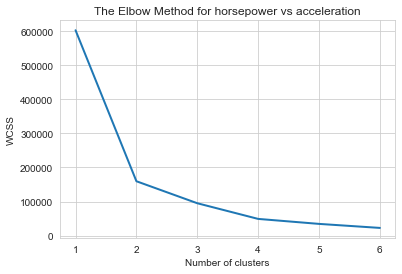

In [48]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=10)
    kmeans.fit(X[['horsepower','acceleration']])
    
    wcss.append(kmeans.inertia_)

sns.set_style('whitegrid')
sns.lineplot(x=range(1,7), y=wcss,lw= 2)
plt.title('The Elbow Method for horsepower vs acceleration')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  

In [49]:
kmeans = KMeans(n_clusters = 4, init='k-means++', random_state=10)
kmeans.fit(X[['horsepower','acceleration']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [50]:
k_cluster['clusters']= kmeans.fit_predict(X[['horsepower','acceleration']])

Text(0.5, 1, 'Clusters between horsepower vs weight')

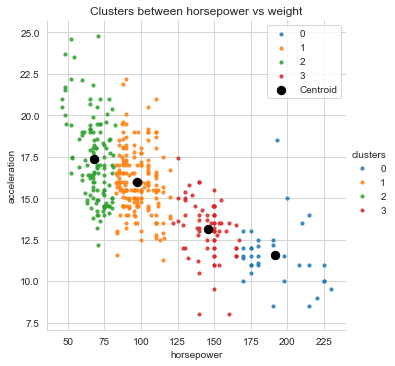

In [51]:
sns.lmplot(x='horsepower', y='acceleration', data=k_cluster, hue='clusters', fit_reg=False,scatter_kws={'s': 10})
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c ='black', label = 'Centroid')
plt.legend()
plt.title('Clusters between horsepower vs weight')

## K-Means Clustering for 'weight' vs 'acceleration'

Text(0, 0.5, 'WCSS')

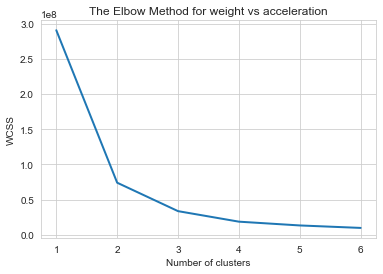

In [52]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=10)
    kmeans.fit(X[['weight','acceleration']])
    
    wcss.append(kmeans.inertia_)

sns.set_style('whitegrid')
sns.lineplot(x=range(1,7), y=wcss,lw= 2)
plt.title('The Elbow Method for weight vs acceleration')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  

In [53]:
kmeans = KMeans(n_clusters = 4, init='k-means++', random_state=10)
kmeans.fit(X[['weight','acceleration']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [54]:
k_cluster['clusters']= kmeans.fit_predict(X[['weight','acceleration']])

Text(0.5, 1, 'Clusters between weight vs acceleration')

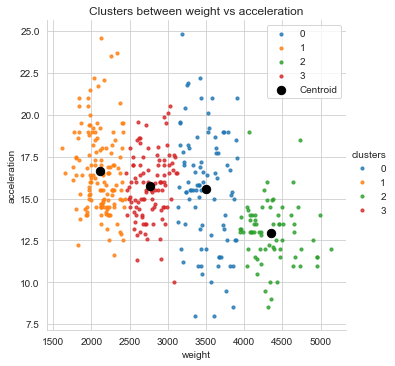

In [55]:
sns.lmplot(x='weight', y='acceleration', data=k_cluster, hue='clusters', fit_reg=False,scatter_kws={'s': 10})
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c ='black', label = 'Centroid')
plt.legend()
plt.title('Clusters between weight vs acceleration')